<a href="https://colab.research.google.com/github/cs-amy/project-codebase/blob/main/notebooks/colab_train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MSc Project Model Training on Google Colab**
`Author: Ashraf Muhammed Yusuf (23011173)`

This notebook sets up the environment for training a letter classification model on Google Colab.

## 1. Clone the GitHub Repository

First, clone the project's GitHub repository.

In [1]:
# Delete the project-codebase directory if it exists
!rm -rf project-codebase

!git clone https://github.com/cs-amy/project-codebase.git
%cd project-codebase

Cloning into 'project-codebase'...
remote: Enumerating objects: 339, done.
remote: Counting objects: 100% (339/339), done.
remote: Compressing objects: 100% (242/242), done.
remote: Total 339 (delta 152), reused 254 (delta 78), pack-reused 0 (from 0)
Receiving objects: 100% (339/339), 1.03 MiB | 12.98 MiB/s, done.
Resolving deltas: 100% (152/152), done.
/content/project-codebase


## 2. Mount Google Drive (for data files)

If the project's data files are stored in Google Drive, mount it here.

Note: If you do not already have the project data saved to your drive:


1.   Access it here: https://drive.google.com/drive/folders/1sfNG1PkmTPBe1wOSQXZmfdkvR97Hn9lk?usp=sharing
2.   Copy the entire folder to your drive



In [2]:
from google.colab import drive
drive.mount('/content/drive')

print("Drive mounted successfully!")

Mounted at /content/drive
Drive mounted successfully!


In [3]:
# Create symbolic links to the data directory
!ln -s /content/drive/MyDrive/MScProject/data data

print("Symbolic links created successfully!")

Symbolic links created successfully!


## 3. Install Dependencies

Install the required packages from the requirements.txt file.

In [4]:
!pip install -r requirements.txt

# Specific versions of PyTorch with CUDA support
!pip install torch==2.2.2 torchvision==0.17.2 torchaudio==2.2.2 --index-url https://download.pytorch.org/whl/cu118

print("All dependencies installed successfully!")

ERROR: Could not find a version that satisfies the requirement jax-metal==0.1.0 (from versions: none)
ERROR: No matching distribution found for jax-metal==0.1.0
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.2/819.2 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 104.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 98.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 118.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.

## 4. Set Up Python Path

Set up the python path correctly.

In [5]:
import sys
sys.path.append('/content/project-codebase')

print("Python path set up successfully!")

Python path set up successfully!


## 5. Model Configuration
Model configuration for the letter classifier.

In [6]:
config = {
    "model": {
        "architecture": "LetterClassifierCNN",
        "input_shape": [28, 28, 1],  # Height, Width, Channels
        "num_classes": 26,  # a-z
        "dropout_rate": 0.5 # Dropout rate for the model
    },
    "training": {
        "epochs": 100,
        "batch_size": 64,  # Will be automatically adjusted based on available memory
        "learning_rate": 0.01, # Learning rate for the optimizer
        "weight_decay": 0.0001, # Weight decay for the optimizer
        "optimizer": "adam", # Optimizer to use
        "lr_scheduler": {
            "use": True, # Whether to use a learning rate scheduler
            "type": "reduce_on_plateau", # Type of learning rate scheduler
            "patience": 5, # Number of epochs to wait before reducing learning rate
            "factor": 0.5, # Factor by which the learning rate will be reduced
            "min_lr": 0.00001 # Minimum learning rate
        },
        "early_stopping": {
            "use": True, # Whether to use early stopping
            "patience": 15, # Number of epochs to wait before stopping if no improvement
            "min_delta": 0.001 # Minimum change in loss to qualify as an improvement
        }
    },
    "data": {
        "regular": {
            "train_dir": "data/characters/regular/train",
            "test_dir": "data/characters/regular/test"
        },
        "obfuscated": {
            "train_dir": "data/characters/obfuscated/train",
            "test_dir": "data/characters/obfuscated/test"
        },
        "image_size": [28, 28],  # Input image size (height, width)
        "validation_split": 0.2,  # Portion of training data to use for validation
        "shuffle": True, # Whether to shuffle the data
        "augmentation": {
            "use": True, # Whether to apply augmentation to the image
            "rotation_range": 10, # Randomly rotate the image
            "zoom_range": 0.1, # Randomly zoom in or out on the image
            "width_shift_range": 0.1, # Randomly shift the image horizontally
            "height_shift_range": 0.1, # Randomly shift the image vertically
            "brightness_range": [0.8, 1.2], # Randomly adjust brightness of the image
            "random_noise": 0.01 # Add random noise to the image
        }
    },
    "output": {
        "dir": "outputs/letter_classifier",  # Relative to project root
        "save_frequency": 5,  # Save checkpoint every N epochs
        "keep_best": True   # Keep best model based on validation loss
    }
}

print("Model configuration set up successfully!")

Model configuration set up successfully!


## 6. Train Model

Set up and run the training routine.

Loading limited test datasets...

Data directory structure validation successful!

Root: /content/drive/MyDrive/MScProject/data/characters

- regular/train: 15200 PNG files

- regular/test: 3791 PNG files

- obfuscated/train: 15510 PNG files

- obfuscated/test: 3875 PNG files

a: Loading images for character

b: Loading images for character

c: Loading images for character

d: Loading images for character

e: Loading images for character

f: Loading images for character

g: Loading images for character

h: Loading images for character

i: Loading images for character

j: Loading images for character

k: Loading images for character

l: Loading images for character

m: Loading images for character

n: Loading images for character

o: Loading images for character

p: Loading images for character

q: Loading images for character

r: Loading images for character

s: Loading images for character

t: Loading images for character

u: Loading images for character

v: Loading images for character

w: Loading images for character

x: Loading images for character

y: Loading images for character

z: Loading images for character

Loaded 15200 images from /content/drive/MyDrive/MScProject/data/characters/regular/train

Character distribution:

- a: 613 images

- b: 613 images

- c: 569 images

- d: 569 images

- e: 613 images

- f: 569 images

- g: 613 images

- h: 569 images

- i: 613 images

- j: 613 images

- k: 569 images

- l: 569 images

- m: 569 images

- n: 569 images

- o: 613 images

- p: 569 images

- q: 569 images

- r: 569 images

- s: 613 images

- t: 569 images

- u: 569 images

- v: 579 images

- w: 569 images

- x: 569 images

- y: 569 images

- z: 613 images

a: Loading images for character

b: Loading images for character

c: Loading images for character

d: Loading images for character

e: Loading images for character

f: Loading images for character

g: Loading images for character

h: Loading images for character

i: Loading images for character

j: Loading images for character

k: Loading images for character

l: Loading images for character

m: Loading images for character

n: Loading images for character

o: Loading images for character

p: Loading images for character

q: Loading images for character

r: Loading images for character

s: Loading images for character

t: Loading images for character

u: Loading images for character

v: Loading images for character

w: Loading images for character

x: Loading images for character

y: Loading images for character

z: Loading images for character

Loaded 15510 images from /content/drive/MyDrive/MScProject/data/characters/obfuscated/train

Character distribution:

- a: 638 images

- b: 629 images

- c: 583 images

- d: 581 images

- e: 639 images

- f: 574 images

- g: 624 images

- h: 579 images

- i: 639 images

- j: 617 images

- k: 576 images

- l: 583 images

- m: 575 images

- n: 580 images

- o: 635 images

- p: 574 images

- q: 574 images

- r: 578 images

- s: 626 images

- t: 583 images

- u: 587 images

- v: 576 images

- w: 579 images

- x: 578 images

- y: 578 images

- z: 625 images

a: Loading images for character

b: Loading images for character

c: Loading images for character

d: Loading images for character

e: Loading images for character

f: Loading images for character

g: Loading images for character

h: Loading images for character

i: Loading images for character

j: Loading images for character

k: Loading images for character

l: Loading images for character

m: Loading images for character

n: Loading images for character

o: Loading images for character

p: Loading images for character

q: Loading images for character

r: Loading images for character

s: Loading images for character

t: Loading images for character

u: Loading images for character

v: Loading images for character

w: Loading images for character

x: Loading images for character

y: Loading images for character

z: Loading images for character

Loaded 3791 images from /content/drive/MyDrive/MScProject/data/characters/regular/test

Character distribution:

- a: 153 images

- b: 153 images

- c: 142 images

- d: 142 images

- e: 153 images

- f: 142 images

- g: 153 images

- h: 142 images

- i: 153 images

- j: 153 images

- k: 142 images

- l: 142 images

- m: 142 images

- n: 142 images

- o: 153 images

- p: 142 images

- q: 142 images

- r: 142 images

- s: 153 images

- t: 142 images

- u: 142 images

- v: 142 images

- w: 142 images

- x: 142 images

- y: 142 images

- z: 153 images

a: Loading images for character

b: Loading images for character

c: Loading images for character

d: Loading images for character

e: Loading images for character

f: Loading images for character

g: Loading images for character

h: Loading images for character

i: Loading images for character

j: Loading images for character

k: Loading images for character

l: Loading images for character

m: Loading images for character

n: Loading images for character

o: Loading images for character

p: Loading images for character

q: Loading images for character

r: Loading images for character

s: Loading images for character

t: Loading images for character

u: Loading images for character

v: Loading images for character

w: Loading images for character

x: Loading images for character

y: Loading images for character

z: Loading images for character

Loaded 3875 images from /content/drive/MyDrive/MScProject/data/characters/obfuscated/test

Character distribution:

- a: 160 images

- b: 157 images

- c: 145 images

- d: 143 images

- e: 160 images

- f: 144 images

- g: 156 images

- h: 144 images

- i: 160 images

- j: 154 images

- k: 144 images

- l: 145 images

- m: 144 images

- n: 146 images

- o: 158 images

- p: 144 images

- q: 143 images

- r: 144 images

- s: 157 images

- t: 146 images

- u: 147 images

- v: 144 images

- w: 144 images

- x: 145 images

- y: 145 images

- z: 156 images

Error loading image /content/drive/MyDrive/MScProject/data/characters/obfuscated/train/j/366.png: Numpy is not 
available

RuntimeError: Numpy is not available

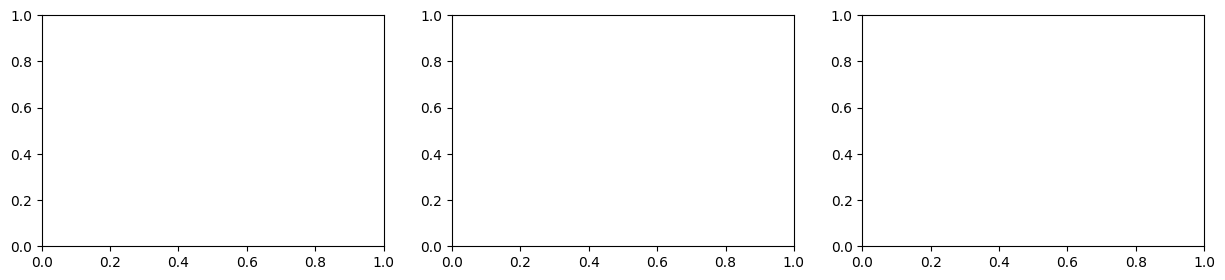

In [8]:
from src.train.train import test_train

# Test training to ensure that everything works as expected
test_train(config)

In [ ]:
from src.train.train import train

# Now do the actual training
train(config)

## 7. Save Results to Google Drive (optional)

Save the trained model and results to Google Drive for persistence.

In [ ]:
# Create directory for results if it doesn't exist
!mkdir -p /content/drive/MyDrive/MScProject/results

# Copy results to Google Drive
!cp -r results/* /content/drive/MyDrive/MScProject/results